In [5]:
import tensorflow as tf
# mnist 데이터를 확보
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

Extracting ./mnist/data\train-images-idx3-ubyte.gz
Extracting ./mnist/data\train-labels-idx1-ubyte.gz
Extracting ./mnist/data\t10k-images-idx3-ubyte.gz
Extracting ./mnist/data\t10k-labels-idx1-ubyte.gz


In [7]:
# 데이터의 갯수 확인
print("학습 데이터:", mnist.train.num_examples)
print("테스트 데이터:", mnist.test.num_examples)

학습 데이터: 55000
테스트 데이터: 10000


Training Image Size: (784,)
Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
실제 라벨(Not One Hotcoding): 3


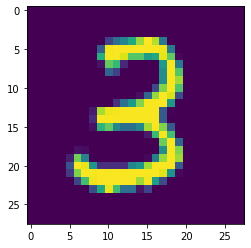

In [19]:
%matplotlib inline
# 데이터 살펴봅시다
import matplotlib.pyplot as plt
import numpy as np

# mnist 안쪽에 어떤 내용이 들어 있는지 확인
# print(help(mnist))
# 학습을 위한 이미지 데이터를 확인
index = 11
# 학습 이미지 사이즈 확인
print("Training Image Size:", mnist.train.images[index].shape)
# 784 = 28 * 28 픽셀의 이미지
# 학습 라벨 데이터 확인
print("Label:", mnist.train.labels[index])
# print("Image Data:\n", mnist.train.images[index].reshape(28, 28))
plt.imshow(mnist.train.images[index].reshape(28, 28))
print("실제 라벨(Not One Hotcoding):", np.argmax(mnist.train.labels[index]))
plt.show()

In [26]:
# 신경망 구성
tf.reset_default_graph()
# 입력층과 출력층 선언
x = tf.placeholder(tf.float32, [None, 784], name = "Input")
# 28*28 -> 학습 데이터의 각 픽셀을 feature로 삼는다
Y = tf.placeholder(tf.float32, [None, 10], name="Output")
# 최종 출력 0 ~ 9 총 10개의 결과로 분류하기 위한 노드

# 입력층 784개의 Feature -> 첫번째 은닉층 256개로 전달하기 위한 가중치
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01), name="Weight1")
L1 = tf.nn.relu(tf.matmul(x, W1), name = "Activation1")
# L1 -> 입력 Fearure * 가중치 -> 활성화함수(relu)

# 첫번째 은닉층 256 -> 두번째 은닉층 256 가중치
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01), name="Weight2")
L2 = tf.nn.relu(tf.matmul(L1, W2), name = "Activation2")
# 두 번째 은닉층 256 -> 출력층 10 가중치
W3 = tf.Variable(tf.random_normal([256, 10], stddev = 0.01), name="Weight3")
model = tf.matmul(L2, W3, name="model") # 모델의 생성

In [32]:
# cross entropy softmax 이용, 개별 이미지에 대한 손실값 계산
cost = tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=model, labels=Y, name ="CrossEntropy"
)
# 전체 평균 손실값 구하기
cost = tf.reduce_mean(cost, name = "CostFunction")
# 최적화 수행을 위한 옵티마이저 선택
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# 변수 초기화를 위한 연산자
init = tf.global_variables_initializer()

In [42]:
# 실제 연산의 수행 : Session 이용
sess = tf.Session()
# Graph Writer
tf.summary.FileWriter("d:/log_dir/mnist", graph=sess.graph)
# 변수 초기화
sess.run(init)

# 전체 학습 데이터를 나눠서 학습 : Mini Batch
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# 실제 학습 수행
for epoch in range(30): # 30회 학습을 수행
    # 1 epoch : 전체 학습 데이터를 1회 학습한 것
    total_cost = 0
    
    # 미니 패치 방식으로 전체 데이터를 학습
    for i in range(total_batch):
        # batch_size 만큼 나누어서 학습
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={ x:batch_xs, Y:batch_ys})
        total_cost += cost_val # 총 손실 값을 ?
        # 전체 데이터를 1회 학습 -> 1 Epoch
    print("Epoch: {}, 평균 Xost: {}".format(epoch + 1, total_cost / total_batch))
    
print("최적화 완료!")

# 테스트 데이터를 모델에 입력하여 실제 결과와 비교해서 평균 -> 정확도
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print("정확도:", sess.run(accuracy, feed_dict={ x :mnist.test.images, Y:mnist.test.labels}))
# sess.close()
        

Epoch: 1, 평균 Xost: 1.3764471940018914
Epoch: 2, 평균 Xost: 0.37079100088639694
Epoch: 3, 평균 Xost: 0.24587923418391835
Epoch: 4, 평균 Xost: 0.17583383154462684
Epoch: 5, 평균 Xost: 0.13965175552462988
Epoch: 6, 평균 Xost: 0.11388288726522164
Epoch: 7, 평균 Xost: 0.09766387244347821
Epoch: 8, 평균 Xost: 0.08124939138747074
Epoch: 9, 평균 Xost: 0.07292324572970921
Epoch: 10, 평균 Xost: 0.06366644855250012
Epoch: 11, 평균 Xost: 0.05598077710548585
Epoch: 12, 평균 Xost: 0.04635196953503923
Epoch: 13, 평균 Xost: 0.04232699485072358
Epoch: 14, 평균 Xost: 0.038214979642917486
Epoch: 15, 평균 Xost: 0.032462516009214924
Epoch: 16, 평균 Xost: 0.02923585683996366
Epoch: 17, 평균 Xost: 0.024999998075972227
Epoch: 18, 평균 Xost: 0.023149313731542366
Epoch: 19, 평균 Xost: 0.01882894361053001
Epoch: 20, 평균 Xost: 0.016957465201743287
Epoch: 21, 평균 Xost: 0.014954721992412073
Epoch: 22, 평균 Xost: 0.012898529388687827
Epoch: 23, 평균 Xost: 0.011227878144391898
Epoch: 24, 평균 Xost: 0.009616735683944585
Epoch: 25, 평균 Xost: 0.008696888253643092


In [45]:
print("최종 가중치:", sess.run(W1))
print("최종 가중치2 :", sess.run(W2))
print("최종 가중치3:", sess.run(W3))

최종 가중치: [[-9.3756738e-04 -2.5286814e-02 -1.4550312e-02 ... -9.0659102e-03
  -8.8167116e-03 -5.6573716e-03]
 [-5.5156839e-03 -1.0102324e-03  9.5587558e-05 ... -9.8891454e-03
   8.3772826e-04 -3.1347375e-03]
 [ 5.8929292e-03  1.6679300e-02 -1.0839881e-02 ... -1.4164657e-02
   2.1900085e-03 -1.0067101e-02]
 ...
 [-1.5073970e-02 -1.1282928e-04  3.0917434e-03 ...  7.1124970e-03
  -7.6337997e-03 -5.0814436e-03]
 [ 1.3931319e-03 -1.1662540e-02  4.7434529e-04 ... -5.6195874e-03
   1.7924381e-02 -1.8507791e-04]
 [-6.2814576e-04 -4.1448823e-03 -7.5106686e-03 ... -1.0710584e-02
   2.8465553e-03  8.2601449e-03]]
최종 가중치2 : [[ 0.04759099  0.01842112 -0.00013523 ... -0.00489517  0.0197764
   0.01054572]
 [-0.01853652  0.07074273 -0.04166685 ...  0.12472002  0.00778359
   0.07988806]
 [-0.04019354 -0.04923875  0.04719345 ...  0.03113669 -0.0019767
  -0.03466527]
 ...
 [ 0.01369947 -0.01595862  0.05762906 ... -0.05631676 -0.00991587
  -0.01463593]
 [-0.06953728 -0.01068948  0.0364682  ...  0.02149746 -

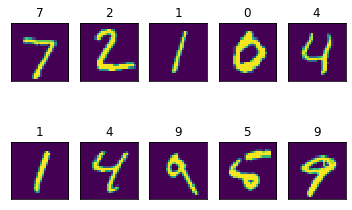

In [54]:
# 총 10개의 test 데이터를 확인해보고(model로)
# test 라벨과 매칭(확인)해 봅시다.
lables = sess.run(model, feed_dict={ x:mnist.test.images, Y:mnist.test.labels})

# 2 * 5의 차트 만들기
fig = plt.figure()
for i in range(10): # 0 ~9 번 인덱스까지
    subplot = fig.add_subplot(2, 5, i +1)
    subplot.imshow(mnist.test.images[i].reshape(28, 28))
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title("%d" % np.argmax(mnist.test.labels[i]))